# Import Library

In [2]:
# 1. Imports and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score
import nltk
import string
from collections import Counter

# For deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Import the dataset

In [3]:
# Load the dataset
df = pd.read_csv("hamspam.csv")

# Data Wrangling

In [4]:
# 2. Data Wrangling
df.head()
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [5]:
# Handling missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis (EDA)

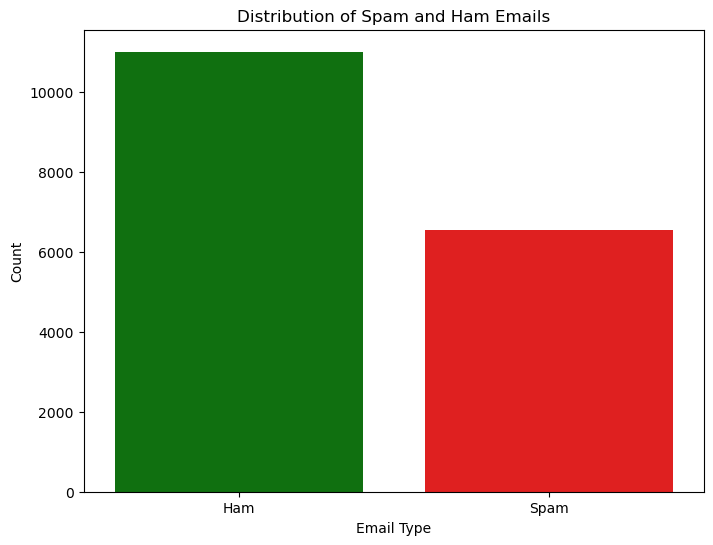

In [6]:
# 3. Exploratory Data Analysis (EDA)

# Visualizing the distribution of spam and ham emails
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df, palette=['green', 'red'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [7]:
# Convert 'Body' to string type
df['Body'] = df['Body'].astype(str)

# Feature Engineering

In [95]:
# Feature Engineering
df['Email_Length'] = df['Body'].apply(len)
df['no_words'] = df['Body'].apply(lambda x: len(x.split()))
df['no_sent'] = df['Body'].apply(lambda x: x.count('.') + x.count('!') + x.count('?'))

In [9]:
# Visualization of Email_Length, no_words, and no_sent
features = ['Email_Length', 'no_words', 'no_sent']
titles = ['Distribution of Email Length', 'Distribution of Number of Words in Emails', 'Distribution of Number of Sentences in Emails']

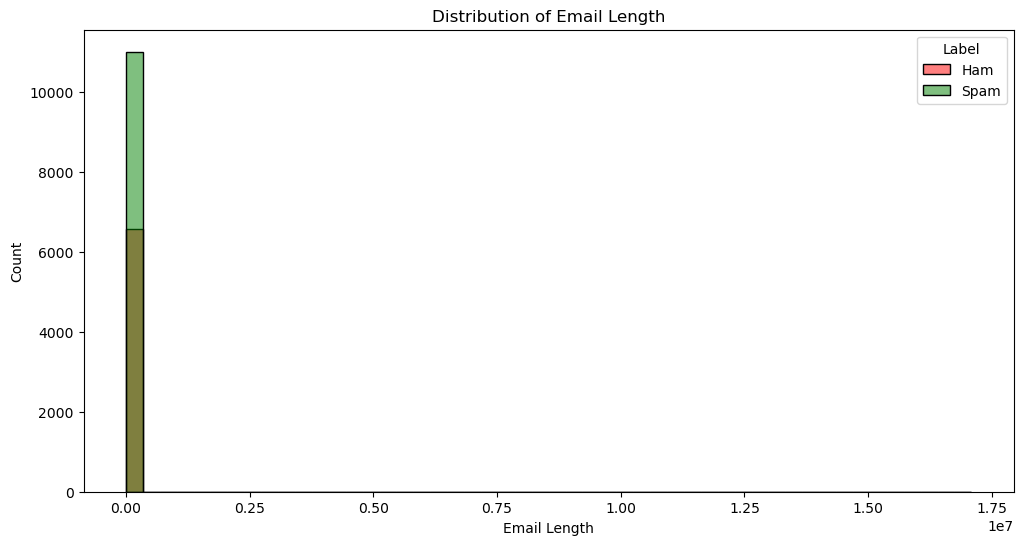

In [10]:
# Visualization of Email_Length for both spam and ham emails
plt.figure(figsize=(12, 6))
sns.histplot(df, x='Email_Length', hue='Label', bins=50, palette=['green', 'red'])
plt.title('Distribution of Email Length')
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.show()

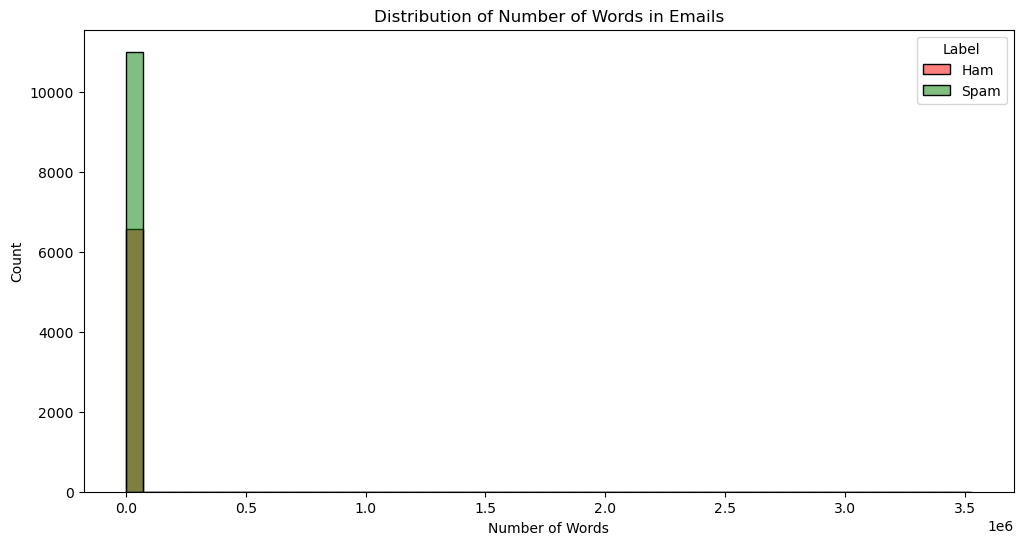

In [11]:
# Visualization of no_words for both spam and ham emails
plt.figure(figsize=(12, 6))
sns.histplot(df, x='no_words', hue='Label', bins=50, palette=['green', 'red'])
plt.title('Distribution of Number of Words in Emails')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.show()

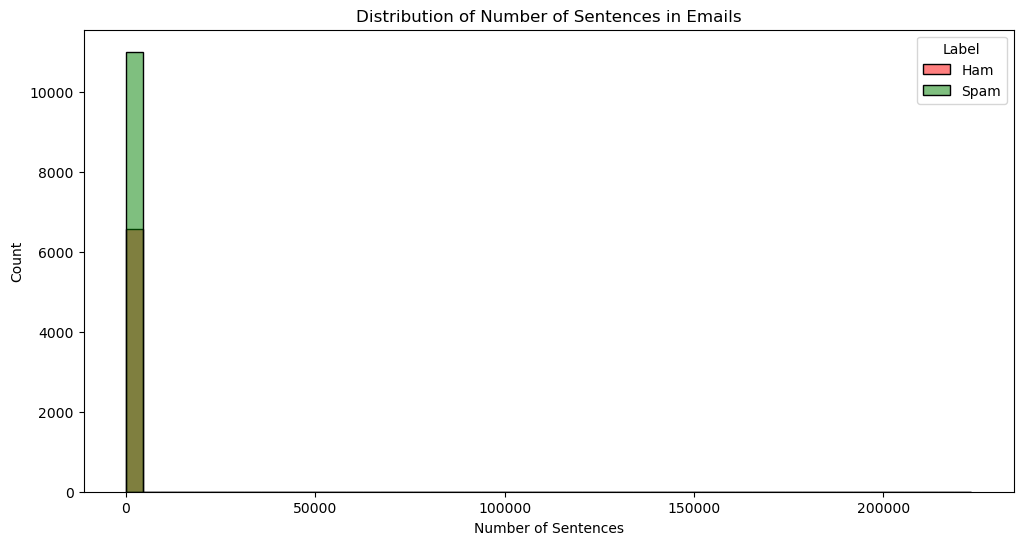

In [12]:
# Visualization of no_sent for both spam and ham emails
plt.figure(figsize=(12, 6))
sns.histplot(df, x='no_sent', hue='Label', bins=50, palette=['green', 'red'])
plt.title('Distribution of Number of Sentences in Emails')
plt.xlabel('Number of Sentences')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.show()

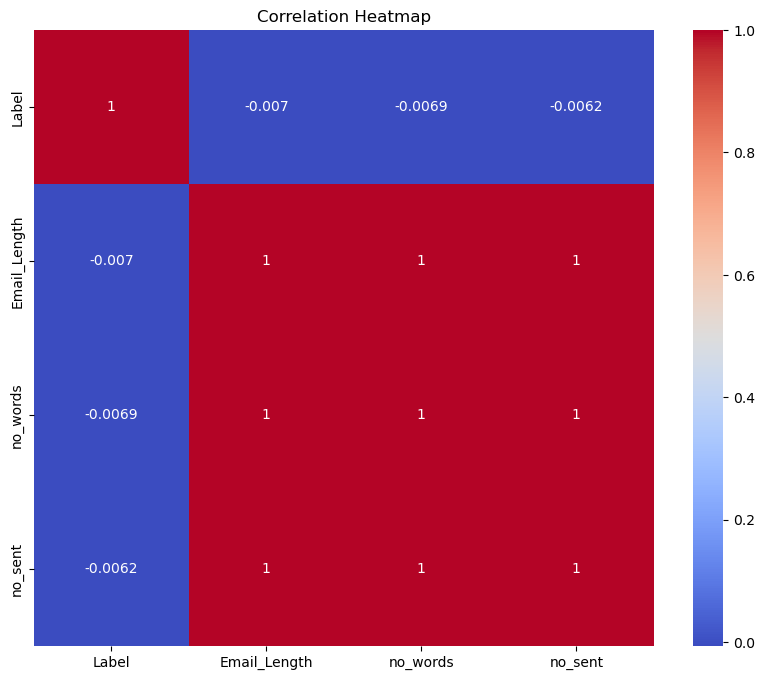

In [13]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The code generates and displays a word cloud visualization for spam messages from a given dataframe containing message bodies and labels.

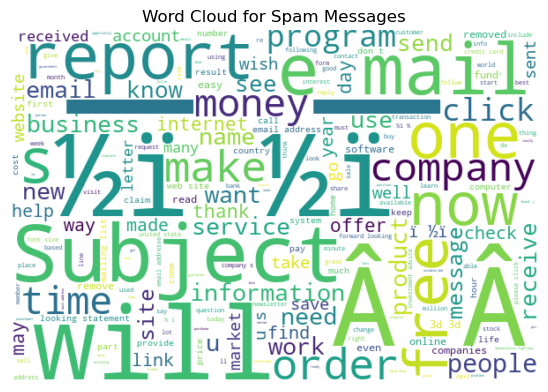

In [14]:
from wordcloud import WordCloud

# Separate the messages into spam and ham
spam_messages = ' '.join(df[df['Label'] == 1]['Body'])
ham_messages = ' '.join(df[df['Label'] == 0]['Body'])

# Generate word clouds
spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(spam_messages)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_messages)

# Visualization: Word clouds for Spam and Ham messages
plt.figure(figsize=(15, 7))

# Spam Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.show()


The code generates and displays a word cloud visualization for Ham messages from a given dataframe containing message bodies and labels.

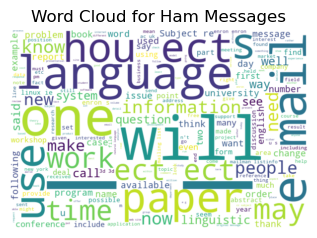

In [15]:
# Ham Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.tight_layout()
plt.show()

# The code visualizes the top 20 most frequent words in both spam and ham messages using bar charts.

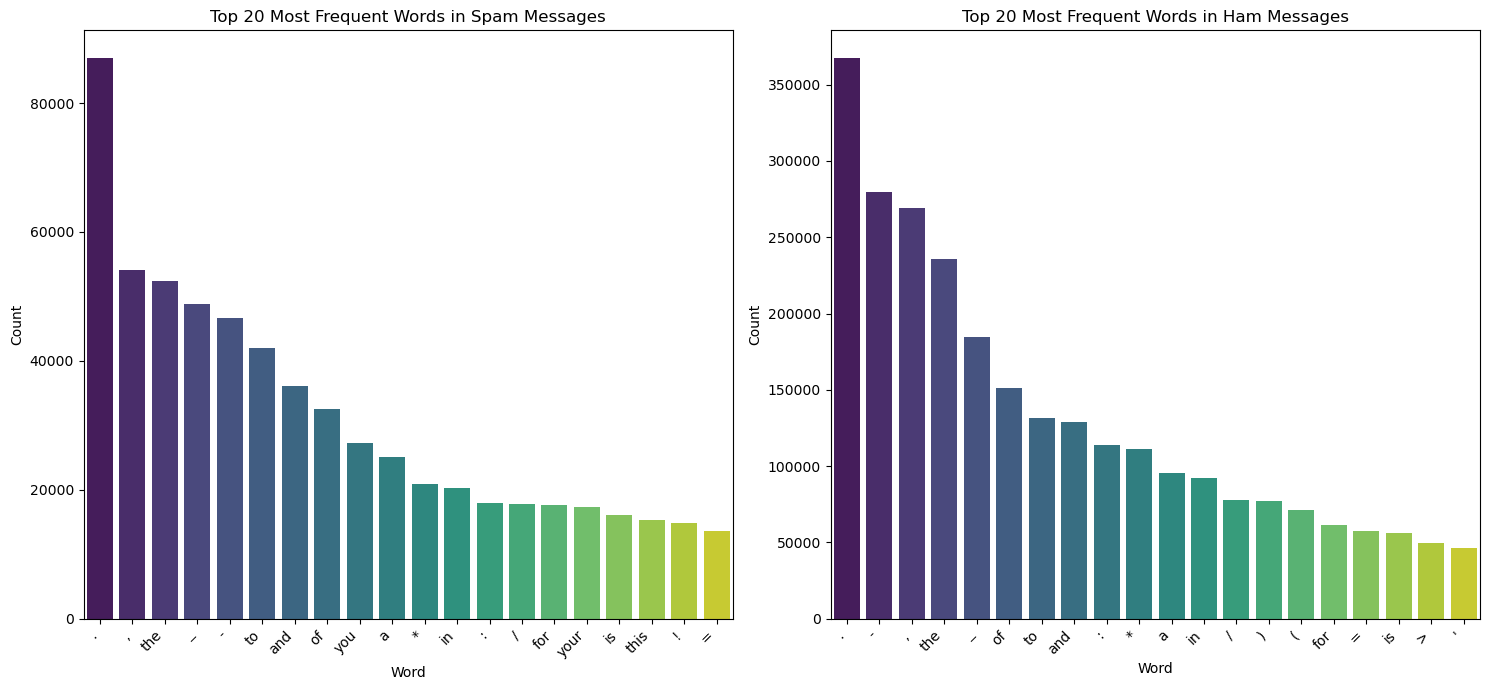

In [16]:
# Get the top 20 most common words in spam and ham messages using Counter
top_spam_words = Counter(spam_messages.split()).most_common(20)
top_ham_words = Counter(ham_messages.split()).most_common(20)

# Convert to DataFrame for visualization
df_spam_words = pd.DataFrame(top_spam_words, columns=['Word', 'Count'])
df_ham_words = pd.DataFrame(top_ham_words, columns=['Word', 'Count'])

# Visualization: Bar charts for most frequent words in Spam and Ham messages
plt.figure(figsize=(15, 7))

# Bar chart for Spam words
plt.subplot(1, 2, 1)
sns.barplot(data=df_spam_words, x='Word', y='Count', palette='viridis')
plt.title('Top 20 Most Frequent Words in Spam Messages')
plt.xticks(rotation=45, ha='right')

# Bar chart for Ham words
plt.subplot(1, 2, 2)
sns.barplot(data=df_ham_words, x='Word', y='Count', palette='viridis')
plt.title('Top 20 Most Frequent Words in Ham Messages')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Split the dataset into train and test data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = df['Body']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((14056, 150416), (3515, 150416))

# GaussianNB
This code trains a Gaussian Naive Bayes classifier on TF-IDF processed text data, evaluates its performance on both training and test datasets using accuracy, precision, and F1-score metrics, and then visualizes these metrics in a bar chart and the confusion matrices for both datasets in separate plots.

Metrics for Training Data:
Accuracy: 0.9415
Precision: 0.8695
F1 Score: 0.9270

Metrics for Test Data:
Accuracy: 0.9082
Precision: 0.8409
F1 Score: 0.8828


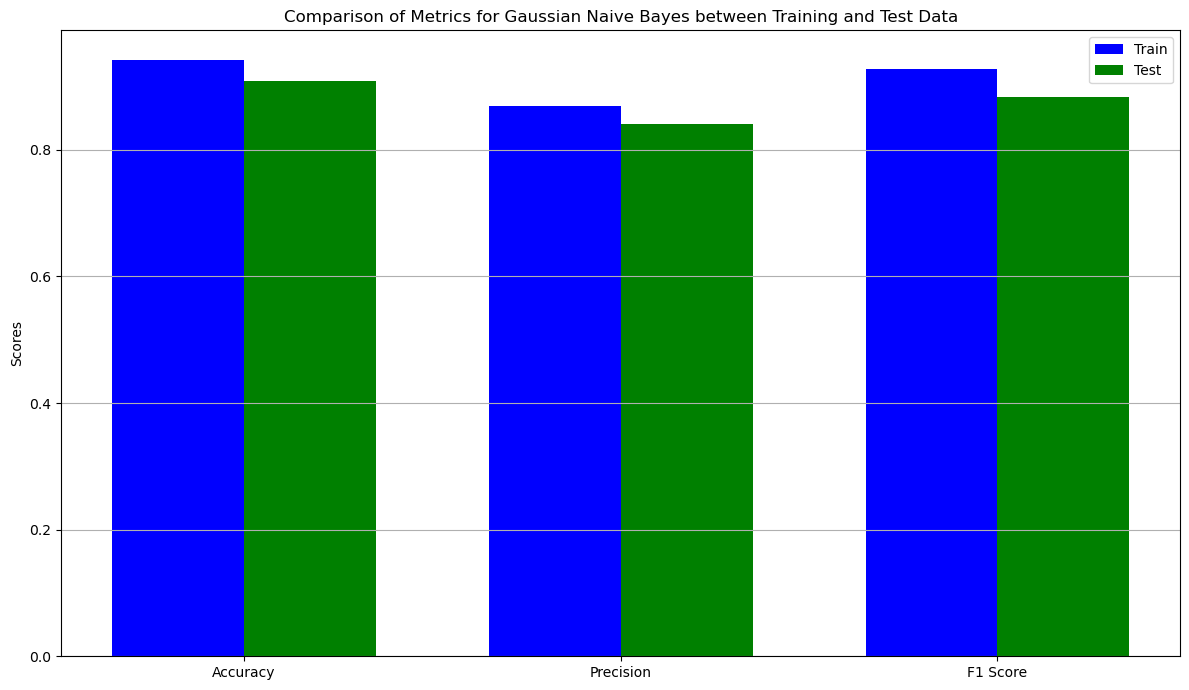

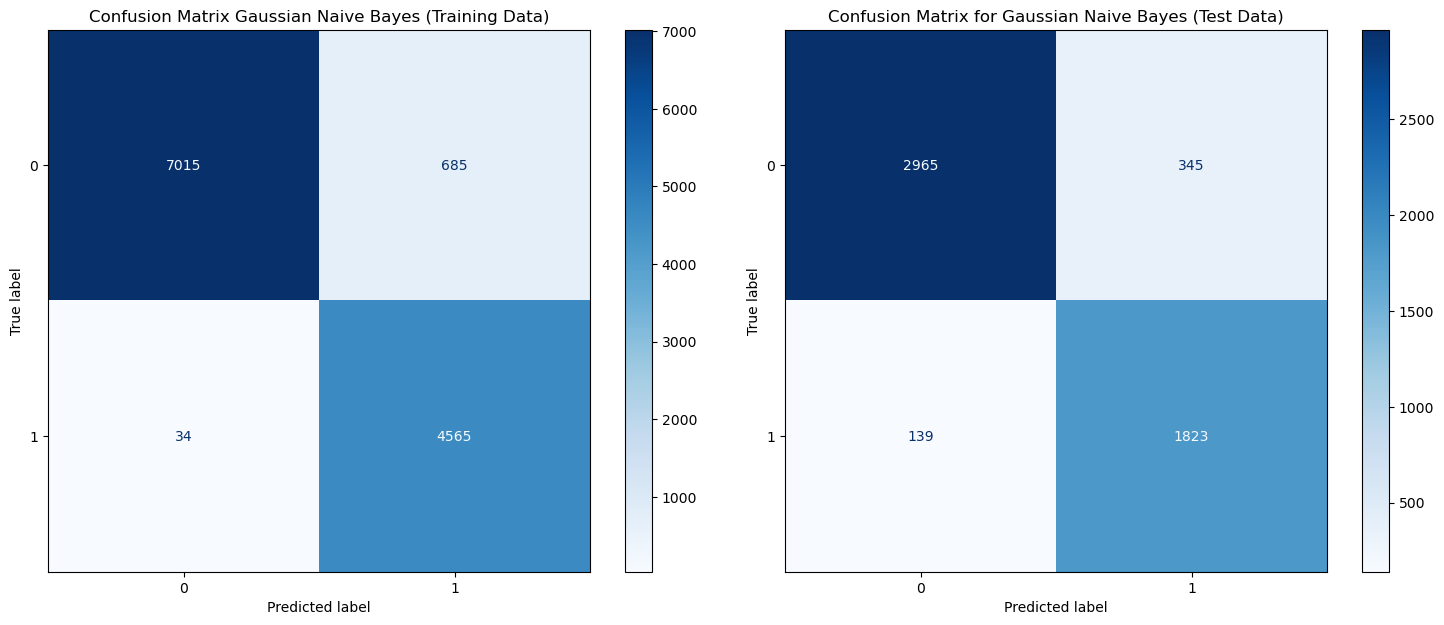

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train)

# 2. Predict on the training and test sets
y_train_pred_gnb = gnb.predict(X_train_tfidf.toarray())
y_test_pred_gnb = gnb.predict(X_test_tfidf.toarray())

# 3. Compute metrics for the training and test data
metrics_train = {
    'Accuracy': accuracy_score(y_train, y_train_pred_gnb),
    'Precision': precision_score(y_train, y_train_pred_gnb),
    'F1 Score': f1_score(y_train, y_train_pred_gnb)
}

metrics_test = {
    'Accuracy': accuracy_score(y_test, y_test_pred_gnb),
    'Precision': precision_score(y_test, y_test_pred_gnb),
    'F1 Score': f1_score(y_test, y_test_pred_gnb)
}

# Print metrics for training data
print("Metrics for Training Data:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

# Print metrics for test data
print("\nMetrics for Test Data:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")
    
# 4. Plot a comparison graph for metrics
labels = list(metrics_train.keys())
train_vals = list(metrics_train.values())
test_vals = list(metrics_test.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, train_vals, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_vals, width, label='Test', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Gaussian Naive Bayes between Training and Test Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Compute and plot confusion matrices for training and test data
cm_train = confusion_matrix(y_train, y_train_pred_gnb)
cm_test = confusion_matrix(y_test, y_test_pred_gnb)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Data Confusion Matrix
ConfusionMatrixDisplay(cm_train, display_labels=gnb.classes_).plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Confusion Matrix Gaussian Naive Bayes (Training Data)')

# Test Data Confusion Matrix
ConfusionMatrixDisplay(cm_test, display_labels=gnb.classes_).plot(cmap='Blues', ax=ax[1], values_format='d')
ax[1].set_title('Confusion Matrix for Gaussian Naive Bayes (Test Data)')

plt.tight_layout()
plt.show()


# MultinomialNB
This code initializes and trains a Multinomial Naive Bayes classifier on TF-IDF processed text data, evaluates its performance metrics on both training and test datasets, and visualizes these metrics and the confusion matrices for both datasets in bar charts and plots.

Training Data Metrics (Multinomial Naive Bayes):
Accuracy: 0.97
Precision: 0.97
F1 Score: 0.96

Test Data Metrics (Multinomial Naive Bayes):
Accuracy: 0.97
Precision: 0.96
F1 Score: 0.95


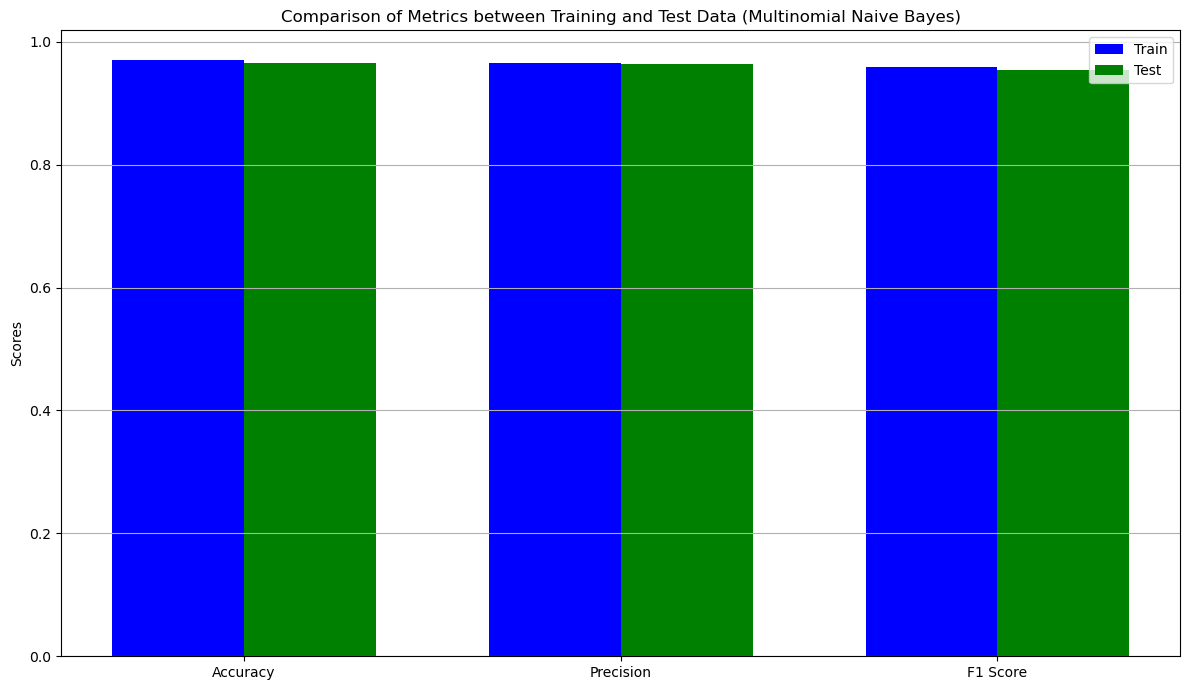

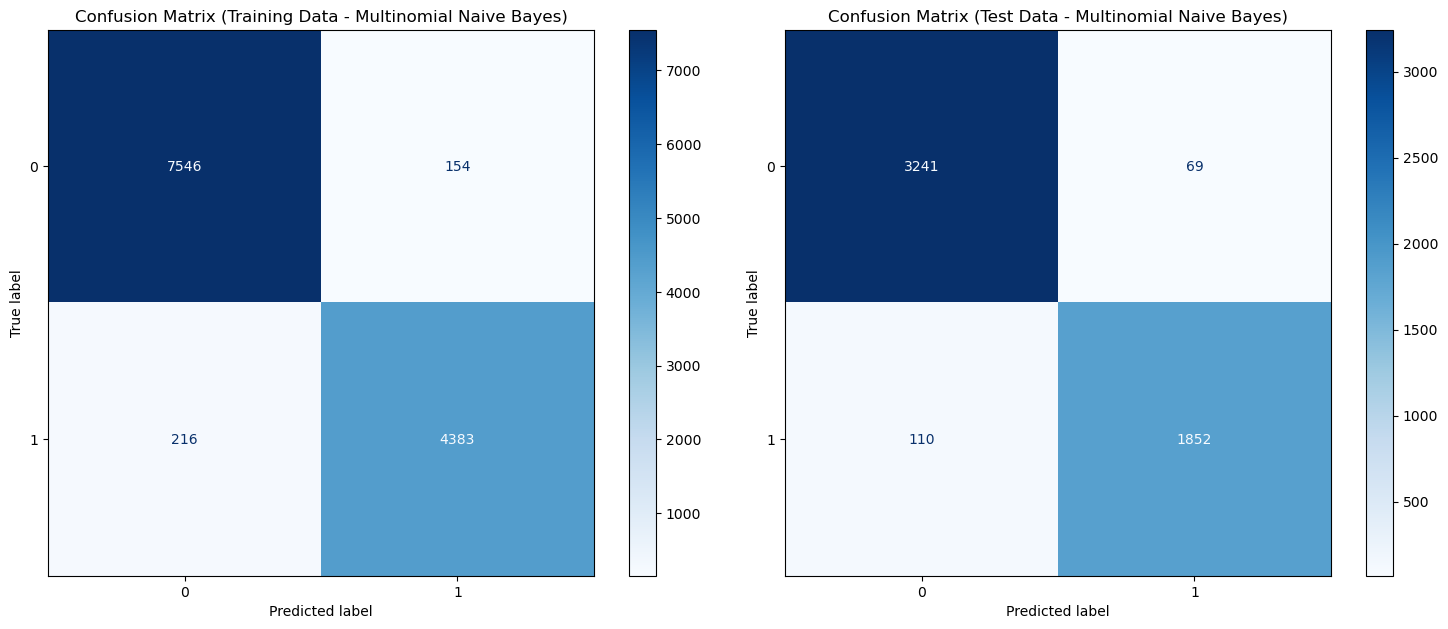

In [79]:
# 1. Initialize Multinomial Naive Bayes and train the model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# 2. Predict on the training and test sets
y_train_pred_mnb = mnb.predict(X_train_tfidf)
y_test_pred_mnb = mnb.predict(X_test_tfidf)

# 3. Compute metrics for the training and test data
metrics_train_mnb = {
    'Accuracy': accuracy_score(y_train, y_train_pred_mnb),
    'Precision': precision_score(y_train, y_train_pred_mnb),
    'F1 Score': f1_score(y_train, y_train_pred_mnb)
}

metrics_test_mnb = {
    'Accuracy': accuracy_score(y_test, y_test_pred_mnb),
    'Precision': precision_score(y_test, y_test_pred_mnb),
    'F1 Score': f1_score(y_test, y_test_pred_mnb)
}

# Print metrics for training data
print("Training Data Metrics (Multinomial Naive Bayes):")
for metric, value in metrics_train_mnb.items():
    print(f"{metric}: {value:.2f}")

print("\nTest Data Metrics (Multinomial Naive Bayes):")
for metric, value in metrics_test_mnb.items():
    print(f"{metric}: {value:.2f}")

# 4. Plot a comparison graph for metrics
labels = list(metrics_train_mnb.keys())
train_vals_mnb = list(metrics_train_mnb.values())
test_vals_mnb = list(metrics_test_mnb.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, train_vals_mnb, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_vals_mnb, width, label='Test', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics between Training and Test Data (Multinomial Naive Bayes)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Compute and plot confusion matrices for training and test data
cm_train_mnb = confusion_matrix(y_train, y_train_pred_mnb)
cm_test_mnb = confusion_matrix(y_test, y_test_pred_mnb)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Data Confusion Matrix
ConfusionMatrixDisplay(cm_train_mnb, display_labels=mnb.classes_).plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Confusion Matrix (Training Data - Multinomial Naive Bayes)')

# Test Data Confusion Matrix
ConfusionMatrixDisplay(cm_test_mnb, display_labels=mnb.classes_).plot(cmap='Blues', ax=ax[1], values_format='d')
ax[1].set_title('Confusion Matrix (Test Data - Multinomial Naive Bayes)')

plt.tight_layout()
plt.show()



# Support Vector Classifier (SVC)
This code trains a Support Vector Classifier (SVC) with a sigmoid kernel on TF-IDF processed text data, evaluates its performance metrics on training and test datasets, and visualizes these metrics along with the confusion matrices for both datasets in bar charts and plots.

Training Data Metrics (Support Vector Classifier):
Accuracy: 0.99
Precision: 0.98
F1 Score: 0.98

Test Data Metrics (Support Vector Classifier):
Accuracy: 0.98
Precision: 0.97
F1 Score: 0.97


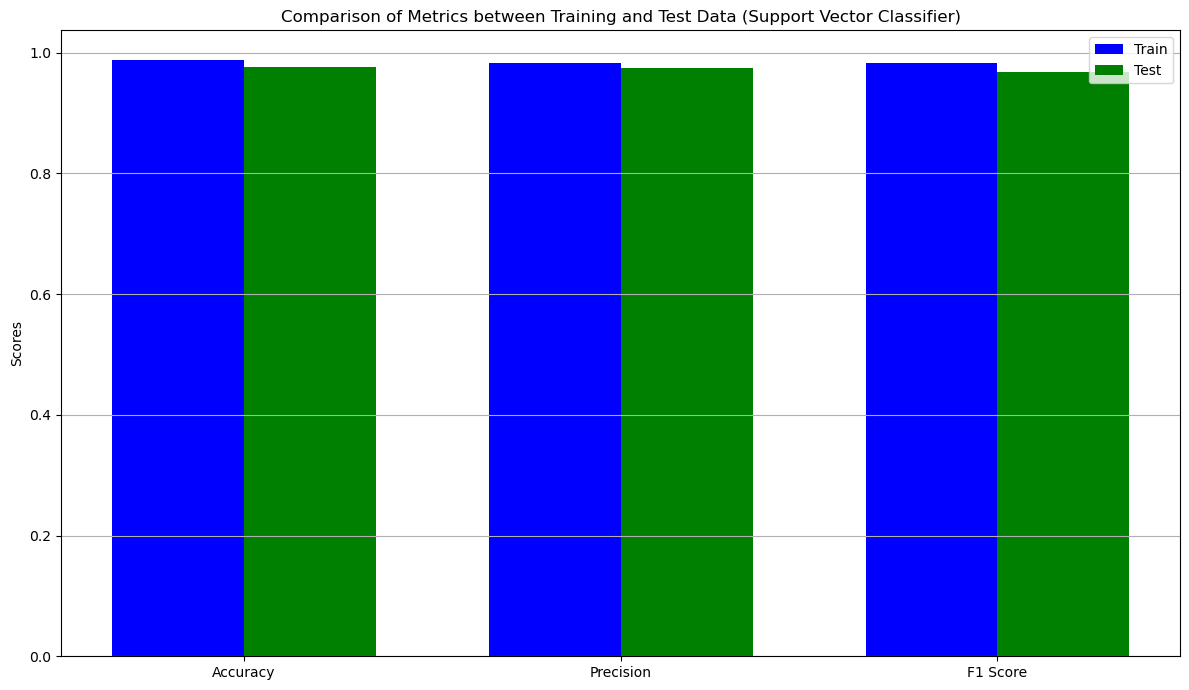

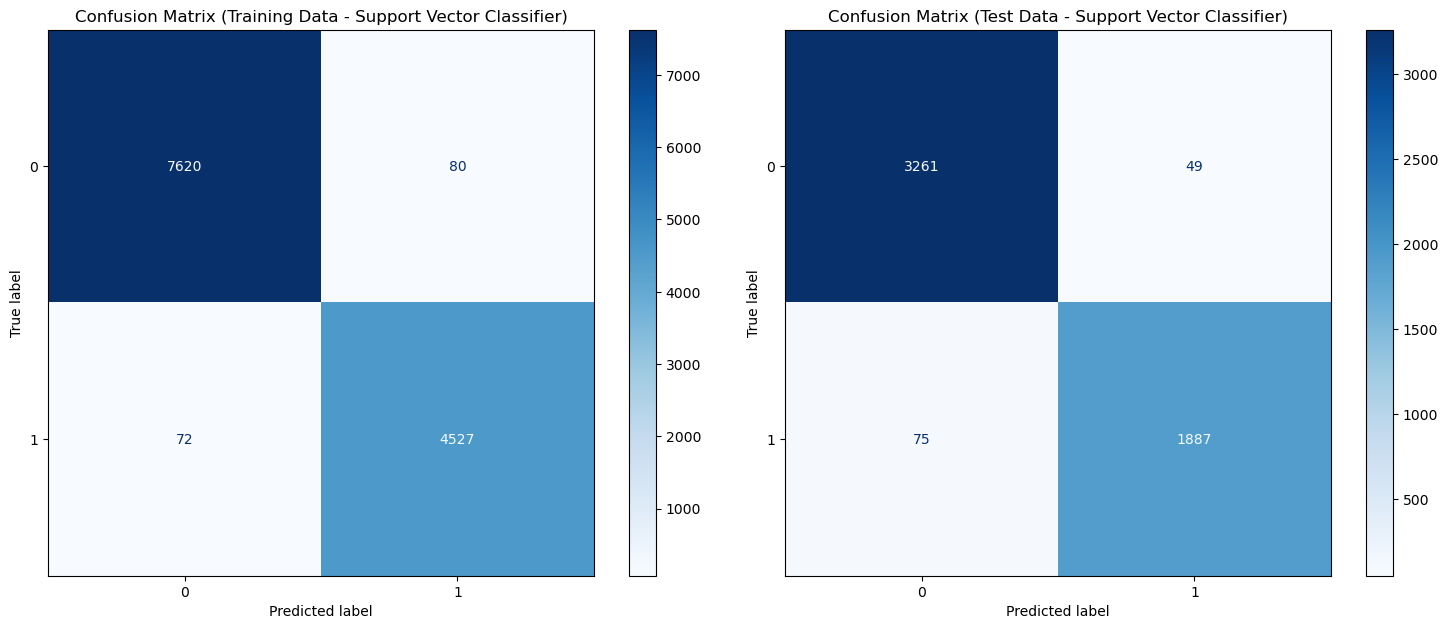

In [80]:
from sklearn.svm import SVC

# 1. Initialize Support Vector Classifier and train the model
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_tfidf, y_train)

# 2. Predict on the training and test sets
y_train_pred_svc = svc.predict(X_train_tfidf)
y_test_pred_svc = svc.predict(X_test_tfidf)

# 3. Compute metrics for the training and test data
metrics_train_svc = {
    'Accuracy': accuracy_score(y_train, y_train_pred_svc),
    'Precision': precision_score(y_train, y_train_pred_svc),
    'F1 Score': f1_score(y_train, y_train_pred_svc)
}

metrics_test_svc = {
    'Accuracy': accuracy_score(y_test, y_test_pred_svc),
    'Precision': precision_score(y_test, y_test_pred_svc),
    'F1 Score': f1_score(y_test, y_test_pred_svc)
}

# Print metrics for training data
print("Training Data Metrics (Support Vector Classifier):")
for metric, value in metrics_train_svc.items():
    print(f"{metric}: {value:.2f}")

print("\nTest Data Metrics (Support Vector Classifier):")
for metric, value in metrics_test_svc.items():
    print(f"{metric}: {value:.2f}")

# 4. Plot a comparison graph for metrics
labels = list(metrics_train_svc.keys())
train_vals_svc = list(metrics_train_svc.values())
test_vals_svc = list(metrics_test_svc.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, train_vals_svc, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_vals_svc, width, label='Test', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics between Training and Test Data (Support Vector Classifier)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Compute and plot confusion matrices for training and test data
cm_train_svc = confusion_matrix(y_train, y_train_pred_svc)
cm_test_svc = confusion_matrix(y_test, y_test_pred_svc)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Data Confusion Matrix
ConfusionMatrixDisplay(cm_train_svc, display_labels=svc.classes_).plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Confusion Matrix (Training Data - Support Vector Classifier)')

# Test Data Confusion Matrix
ConfusionMatrixDisplay(cm_test_svc, display_labels=svc.classes_).plot(cmap='Blues', ax=ax[1], values_format='d')
ax[1].set_title('Confusion Matrix (Test Data - Support Vector Classifier)')

plt.tight_layout()
plt.show()



# K-Nearest Neighbors Classifier
This code trains a K-Nearest Neighbors Classifier on TF-IDF processed text data, evaluates its performance metrics on both training and test datasets, and visualizes these metrics and the confusion matrices for both datasets in bar charts and plots.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training Data Metrics (K-Nearest Neighbors Classifier):
Accuracy: 0.65
Precision: 0.52
F1 Score: 0.68

Test Data Metrics (K-Nearest Neighbors Classifier):
Accuracy: 0.58
Precision: 0.47
F1 Score: 0.64


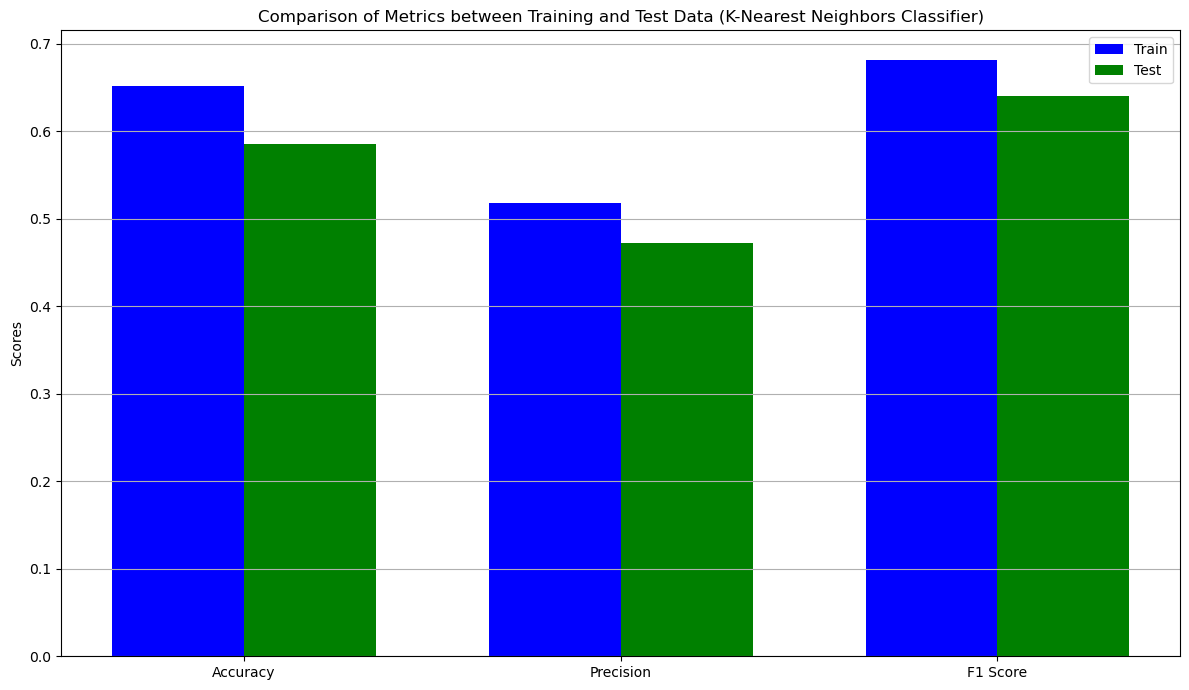

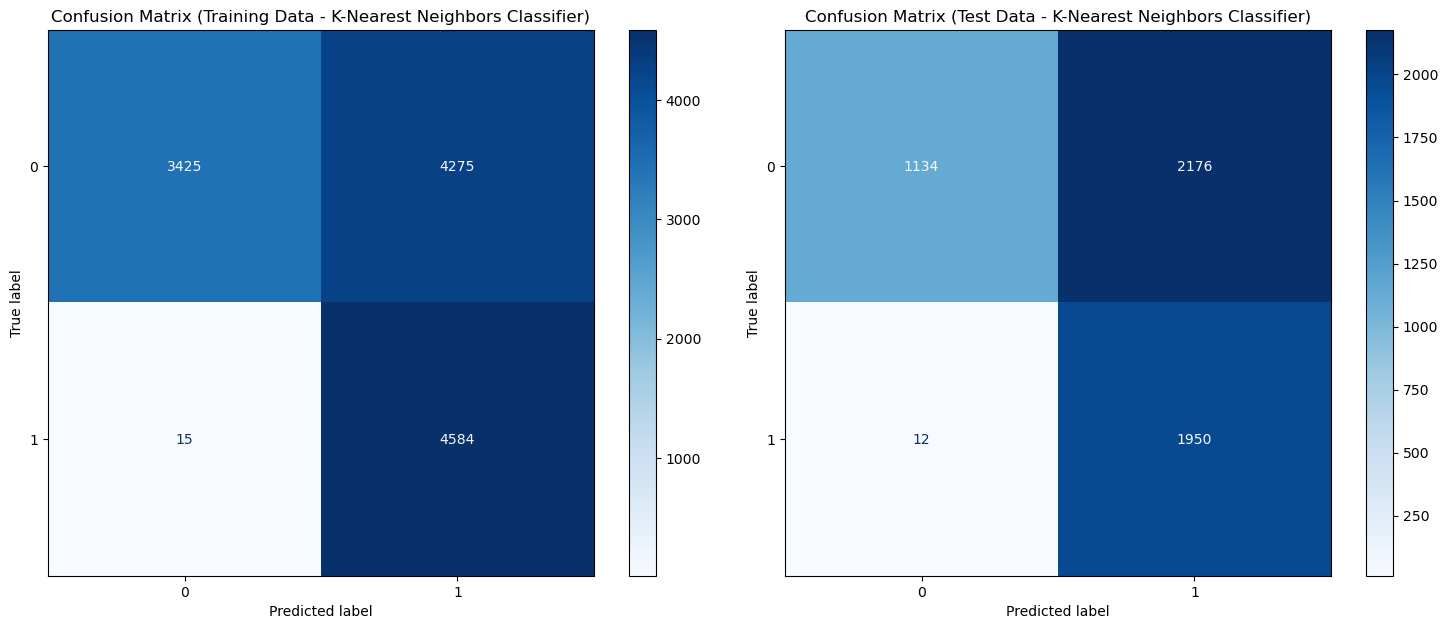

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Initialize K-Nearest Neighbors Classifier and train the model
knc = KNeighborsClassifier()
knc.fit(X_train_tfidf, y_train)

# 2. Predict on the training and test sets
y_train_pred_knc = knc.predict(X_train_tfidf)
y_test_pred_knc = knc.predict(X_test_tfidf)

# 3. Compute metrics for the training and test data
metrics_train_knc = {
    'Accuracy': accuracy_score(y_train, y_train_pred_knc),
    'Precision': precision_score(y_train, y_train_pred_knc),
    'F1 Score': f1_score(y_train, y_train_pred_knc)
}

metrics_test_knc = {
    'Accuracy': accuracy_score(y_test, y_test_pred_knc),
    'Precision': precision_score(y_test, y_test_pred_knc),
    'F1 Score': f1_score(y_test, y_test_pred_knc)
}

# Print metrics for training data
print("Training Data Metrics (K-Nearest Neighbors Classifier):")
for metric, value in metrics_train_knc.items():
    print(f"{metric}: {value:.2f}")

print("\nTest Data Metrics (K-Nearest Neighbors Classifier):")
for metric, value in metrics_test_knc.items():
    print(f"{metric}: {value:.2f}")

# 4. Plot a comparison graph for metrics
labels = list(metrics_train_knc.keys())
train_vals_knc = list(metrics_train_knc.values())
test_vals_knc = list(metrics_test_knc.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, train_vals_knc, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_vals_knc, width, label='Test', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics between Training and Test Data (K-Nearest Neighbors Classifier)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Compute and plot confusion matrices for training and test data
cm_train_knc = confusion_matrix(y_train, y_train_pred_knc)
cm_test_knc = confusion_matrix(y_test, y_test_pred_knc)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Data Confusion Matrix
ConfusionMatrixDisplay(cm_train_knc, display_labels=knc.classes_).plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Confusion Matrix (Training Data - K-Nearest Neighbors Classifier)')

# Test Data Confusion Matrix
ConfusionMatrixDisplay(cm_test_knc, display_labels=knc.classes_).plot(cmap='Blues', ax=ax[1], values_format='d')
ax[1].set_title('Confusion Matrix (Test Data - K-Nearest Neighbors Classifier)')

plt.tight_layout()
plt.show()



# DecisionTreeClassifier
This code initializes and trains a Decision Tree Classifier (with a maximum depth of 5) on TF-IDF processed text data, evaluates its performance metrics on training and test datasets, and visualizes these metrics and the confusion matrices for both datasets in bar charts and plots.

Training Data Metrics (Decision Tree Classifier):
Accuracy: 0.76
Precision: 0.90
F1 Score: 0.55

Test Data Metrics (Decision Tree Classifier):
Accuracy: 0.75
Precision: 0.89
F1 Score: 0.52


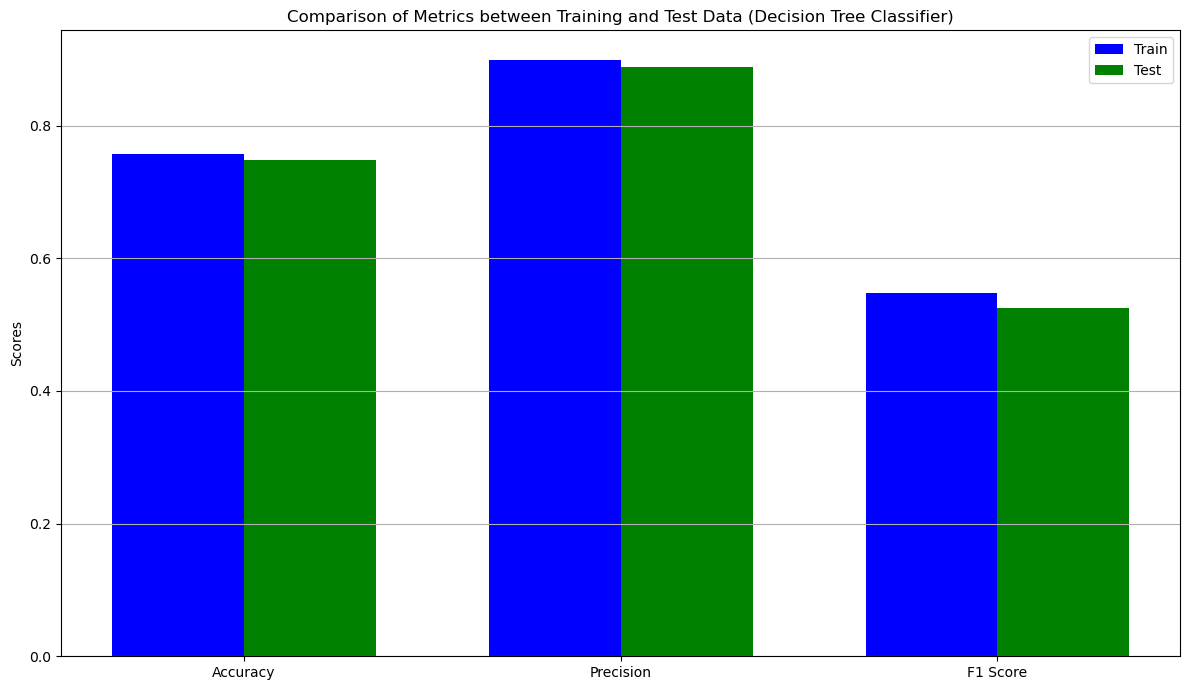

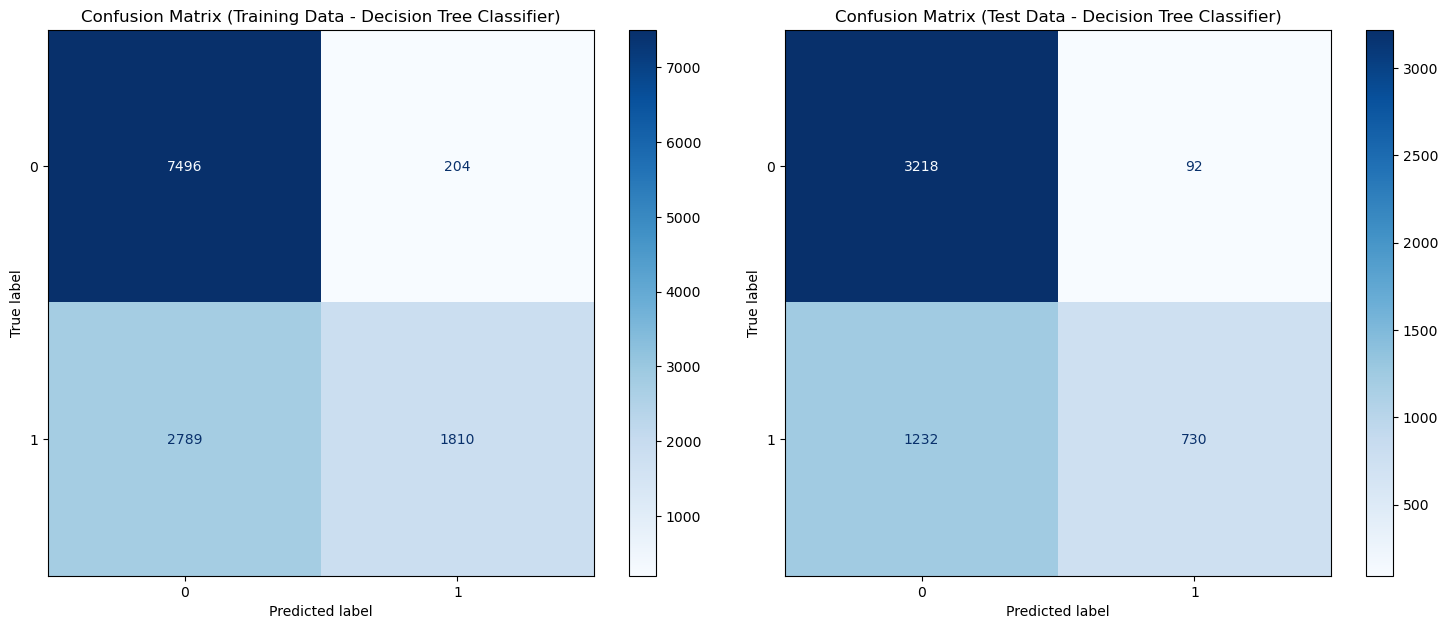

In [81]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize Decision Tree Classifier and train the model
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_tfidf, y_train)

# 2. Predict on the training and test sets
y_train_pred_dtc = dtc.predict(X_train_tfidf)
y_test_pred_dtc = dtc.predict(X_test_tfidf)

# 3. Compute metrics for the training and test data
metrics_train_dtc = {
    'Accuracy': accuracy_score(y_train, y_train_pred_dtc),
    'Precision': precision_score(y_train, y_train_pred_dtc),
    'F1 Score': f1_score(y_train, y_train_pred_dtc)
}

metrics_test_dtc = {
    'Accuracy': accuracy_score(y_test, y_test_pred_dtc),
    'Precision': precision_score(y_test, y_test_pred_dtc),
    'F1 Score': f1_score(y_test, y_test_pred_dtc)
}

# Print metrics for training data
print("Training Data Metrics (Decision Tree Classifier):")
for metric, value in metrics_train_dtc.items():
    print(f"{metric}: {value:.2f}")

print("\nTest Data Metrics (Decision Tree Classifier):")
for metric, value in metrics_test_dtc.items():
    print(f"{metric}: {value:.2f}")

# 4. Plot a comparison graph for metrics
labels = list(metrics_train_dtc.keys())
train_vals_dtc = list(metrics_train_dtc.values())
test_vals_dtc = list(metrics_test_dtc.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, train_vals_dtc, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_vals_dtc, width, label='Test', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics between Training and Test Data (Decision Tree Classifier)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Compute and plot confusion matrices for training and test data
cm_train_dtc = confusion_matrix(y_train, y_train_pred_dtc)
cm_test_dtc = confusion_matrix(y_test, y_test_pred_dtc)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Data Confusion Matrix
ConfusionMatrixDisplay(cm_train_dtc, display_labels=dtc.classes_).plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Confusion Matrix (Training Data - Decision Tree Classifier)')

# Test Data Confusion Matrix
ConfusionMatrixDisplay(cm_test_dtc, display_labels=dtc.classes_).plot(cmap='Blues', ax=ax[1], values_format='d')
ax[1].set_title('Confusion Matrix (Test Data - Decision Tree Classifier)')

plt.tight_layout()
plt.show()




# LogisticRegression

This code trains a Logistic Regression model (with L1 penalty and 'liblinear' solver) on TF-IDF processed text data, evaluates its performance metrics on both training and test datasets, and visualizes these metrics along with the confusion matrices for both datasets in bar charts and plots.

Training Data Metrics (Logistic Regression):
Accuracy: 0.97
Precision: 0.97
F1 Score: 0.97

Test Data Metrics (Logistic Regression):
Accuracy: 0.96
Precision: 0.96
F1 Score: 0.95


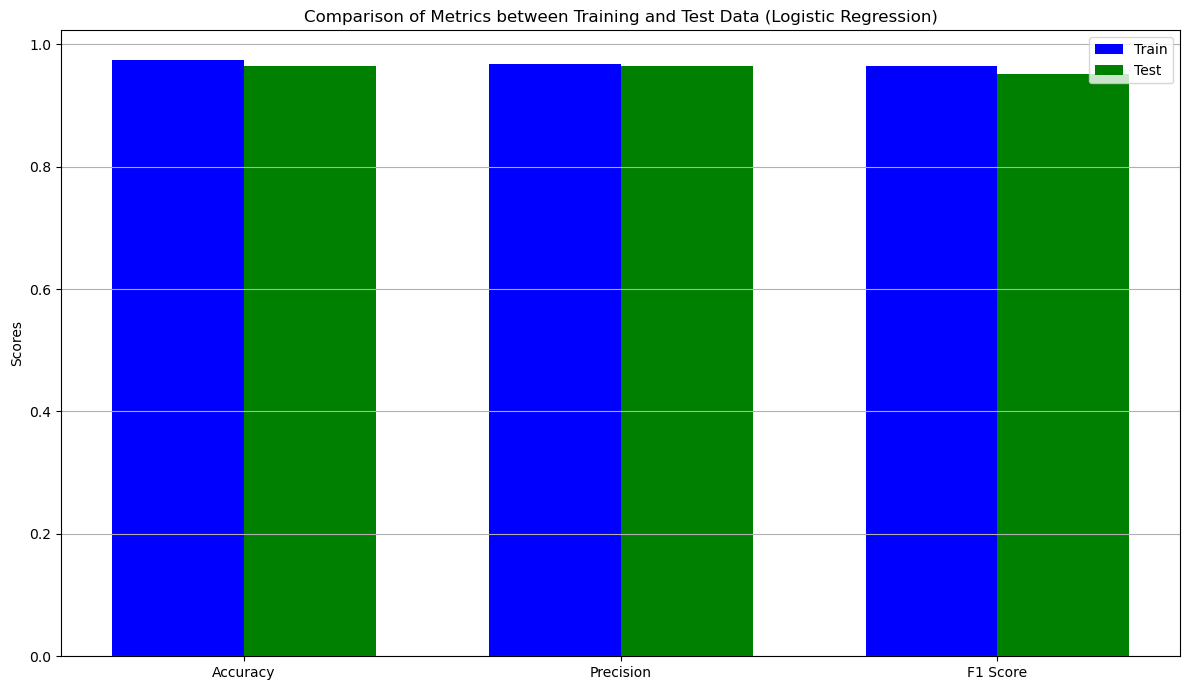

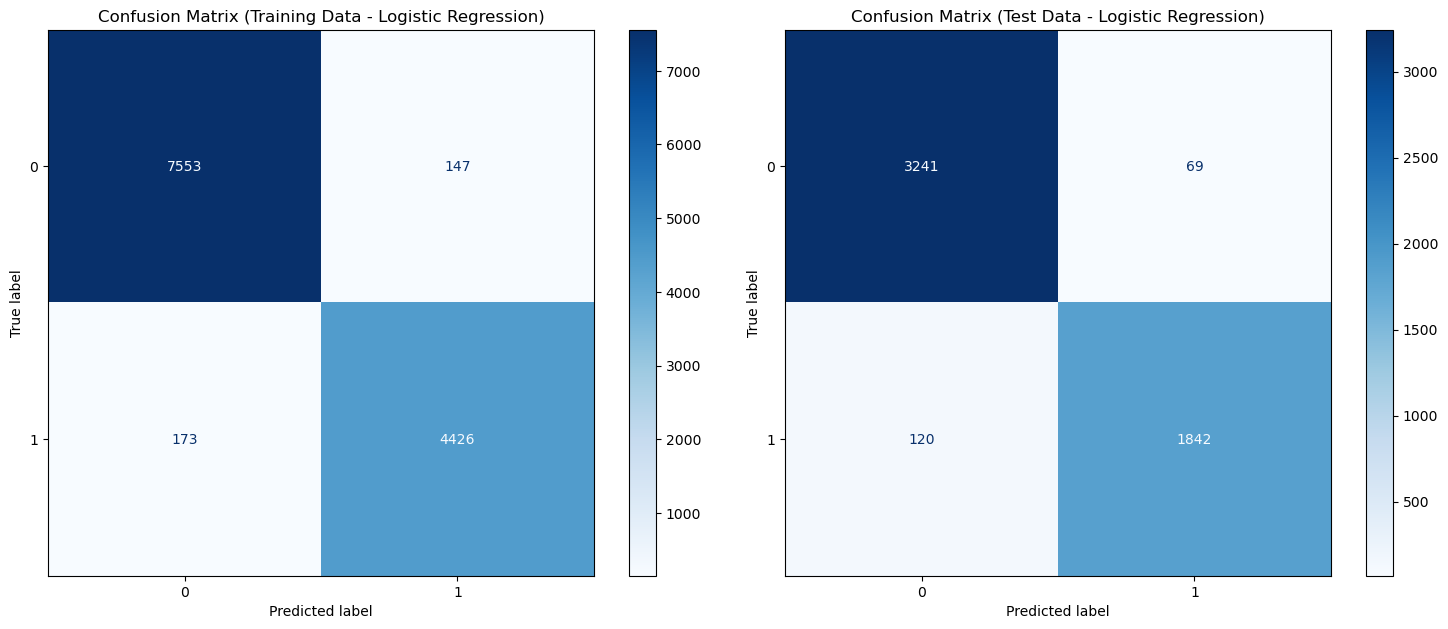

In [82]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize Logistic Regression and train the model
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train_tfidf, y_train)

# 2. Predict on the training and test sets
y_train_pred_lrc = lrc.predict(X_train_tfidf)
y_test_pred_lrc = lrc.predict(X_test_tfidf)

# 3. Compute metrics for the training and test data
metrics_train_lrc = {
    'Accuracy': accuracy_score(y_train, y_train_pred_lrc),
    'Precision': precision_score(y_train, y_train_pred_lrc),
    'F1 Score': f1_score(y_train, y_train_pred_lrc)
}

metrics_test_lrc = {
    'Accuracy': accuracy_score(y_test, y_test_pred_lrc),
    'Precision': precision_score(y_test, y_test_pred_lrc),
    'F1 Score': f1_score(y_test, y_test_pred_lrc)
}

# Print metrics for training data
print("Training Data Metrics (Logistic Regression):")
for metric, value in metrics_train_lrc.items():
    print(f"{metric}: {value:.2f}")

print("\nTest Data Metrics (Logistic Regression):")
for metric, value in metrics_test_lrc.items():
    print(f"{metric}: {value:.2f}")

# 4. Plot a comparison graph for metrics
labels = list(metrics_train_lrc.keys())
train_vals_lrc = list(metrics_train_lrc.values())
test_vals_lrc = list(metrics_test_lrc.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, train_vals_lrc, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_vals_lrc, width, label='Test', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics between Training and Test Data (Logistic Regression)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Compute and plot confusion matrices for training and test data
cm_train_lrc = confusion_matrix(y_train, y_train_pred_lrc)
cm_test_lrc = confusion_matrix(y_test, y_test_pred_lrc)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Data Confusion Matrix
ConfusionMatrixDisplay(cm_train_lrc, display_labels=lrc.classes_).plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Confusion Matrix (Training Data - Logistic Regression)')

# Test Data Confusion Matrix
ConfusionMatrixDisplay(cm_test_lrc, display_labels=lrc.classes_).plot(cmap='Blues', ax=ax[1], values_format='d')
ax[1].set_title('Confusion Matrix (Test Data - Logistic Regression)')

plt.tight_layout()
plt.show()



# RandomForestClassifier
This code initializes and trains a Random Forest Classifier with 50 trees on TF-IDF processed text data, evaluates its performance metrics on both training and test datasets, and visualizes these metrics and the confusion matrices for both datasets in bar charts and plots.

Training Data Metrics (Random Forest Classifier):
Accuracy: 1.00
Precision: 1.00
F1 Score: 1.00

Test Data Metrics (Random Forest Classifier):
Accuracy: 0.97
Precision: 0.95
F1 Score: 0.96


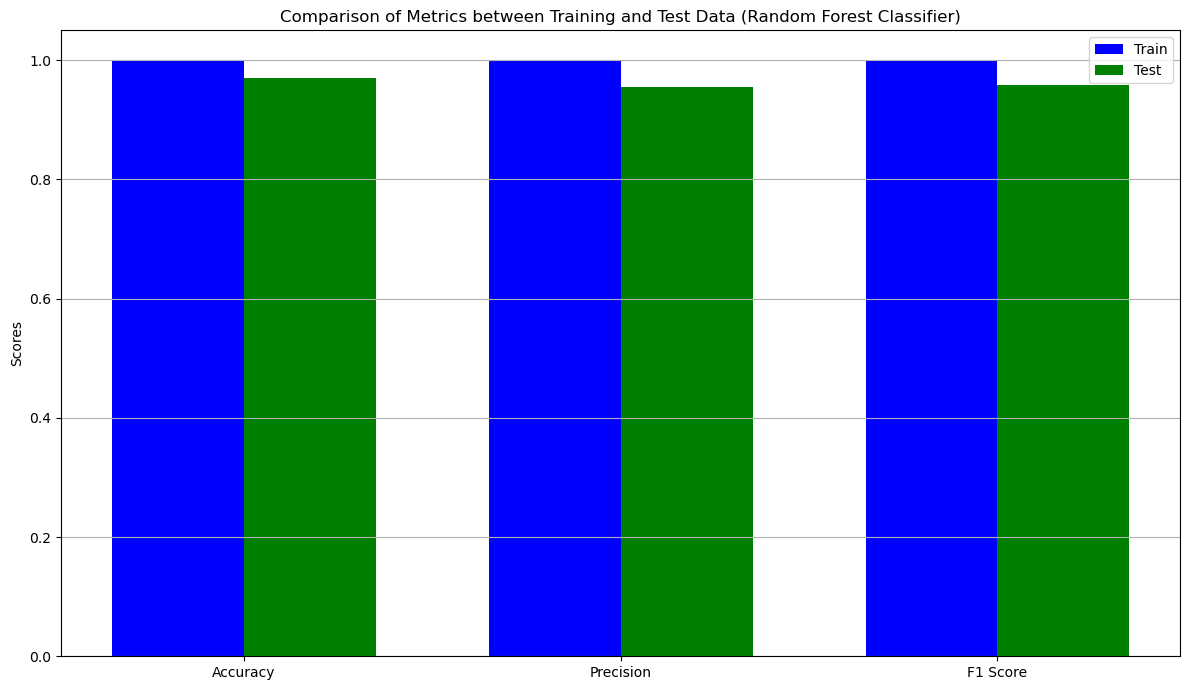

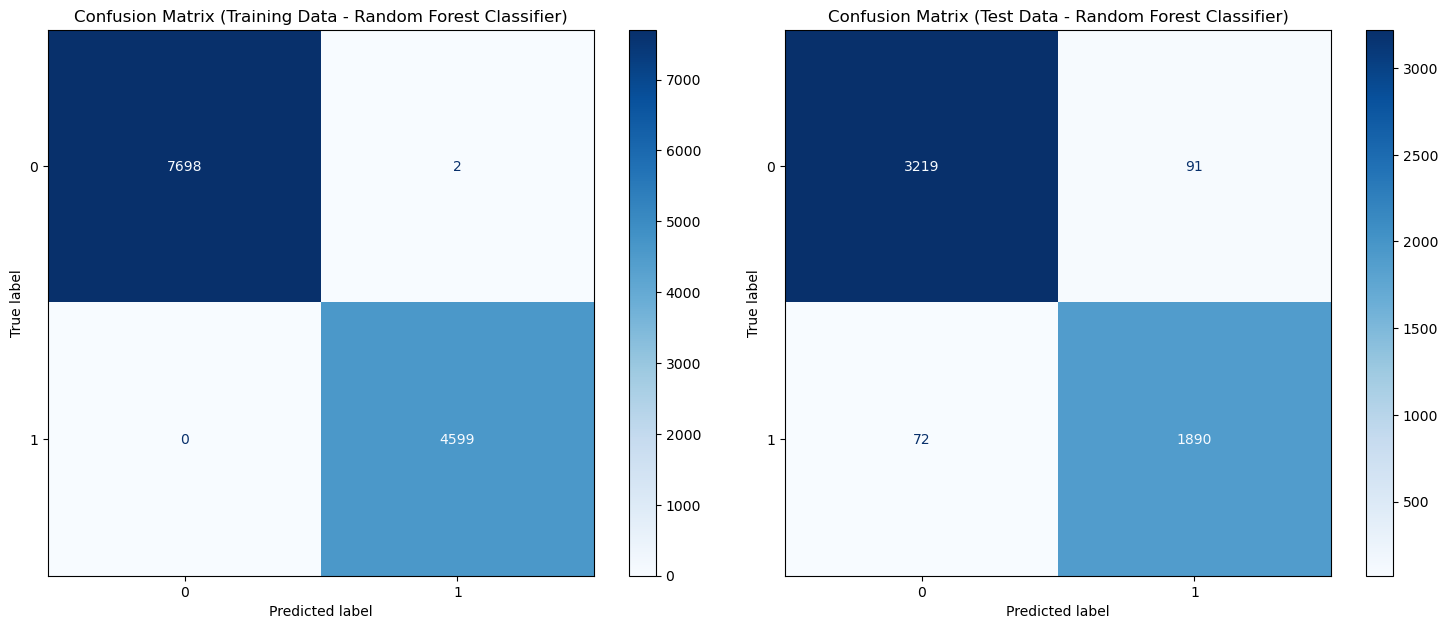

In [83]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize Random Forest Classifier and train the model
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
rfc.fit(X_train_tfidf, y_train)

# 2. Predict on the training and test sets
y_train_pred_rfc = rfc.predict(X_train_tfidf)
y_test_pred_rfc = rfc.predict(X_test_tfidf)

# 3. Compute metrics for the training and test data
metrics_train_rfc = {
    'Accuracy': accuracy_score(y_train, y_train_pred_rfc),
    'Precision': precision_score(y_train, y_train_pred_rfc),
    'F1 Score': f1_score(y_train, y_train_pred_rfc)
}

metrics_test_rfc = {
    'Accuracy': accuracy_score(y_test, y_test_pred_rfc),
    'Precision': precision_score(y_test, y_test_pred_rfc),
    'F1 Score': f1_score(y_test, y_test_pred_rfc)
}

# Print metrics for training data
print("Training Data Metrics (Random Forest Classifier):")
for metric, value in metrics_train_rfc.items():
    print(f"{metric}: {value:.2f}")

print("\nTest Data Metrics (Random Forest Classifier):")
for metric, value in metrics_test_rfc.items():
    print(f"{metric}: {value:.2f}")

# 4. Plot a comparison graph for metrics
labels = list(metrics_train_rfc.keys())
train_vals_rfc = list(metrics_train_rfc.values())
test_vals_rfc = list(metrics_test_rfc.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, train_vals_rfc, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_vals_rfc, width, label='Test', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics between Training and Test Data (Random Forest Classifier)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Compute and plot confusion matrices for training and test data
cm_train_rfc = confusion_matrix(y_train, y_train_pred_rfc)
cm_test_rfc = confusion_matrix(y_test, y_test_pred_rfc)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Data Confusion Matrix
ConfusionMatrixDisplay(cm_train_rfc, display_labels=rfc.classes_).plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Confusion Matrix (Training Data - Random Forest Classifier)')

# Test Data Confusion Matrix
ConfusionMatrixDisplay(cm_test_rfc, display_labels=rfc.classes_).plot(cmap='Blues', ax=ax[1], values_format='d')
ax[1].set_title('Confusion Matrix (Test Data - Random Forest Classifier)')

plt.tight_layout()
plt.show()



# AdaBoostClassifier
This code initializes and trains an AdaBoost Classifier with 50 estimators on TF-IDF processed text data, evaluates its performance metrics on both training and test datasets, and then visualizes these metrics and the confusion matrices for both datasets in bar charts and plots.

Training Data Metrics (AdaBoost Classifier):
Accuracy: 0.92
Precision: 0.86
F1 Score: 0.90

Test Data Metrics (AdaBoost Classifier):
Accuracy: 0.92
Precision: 0.86
F1 Score: 0.89


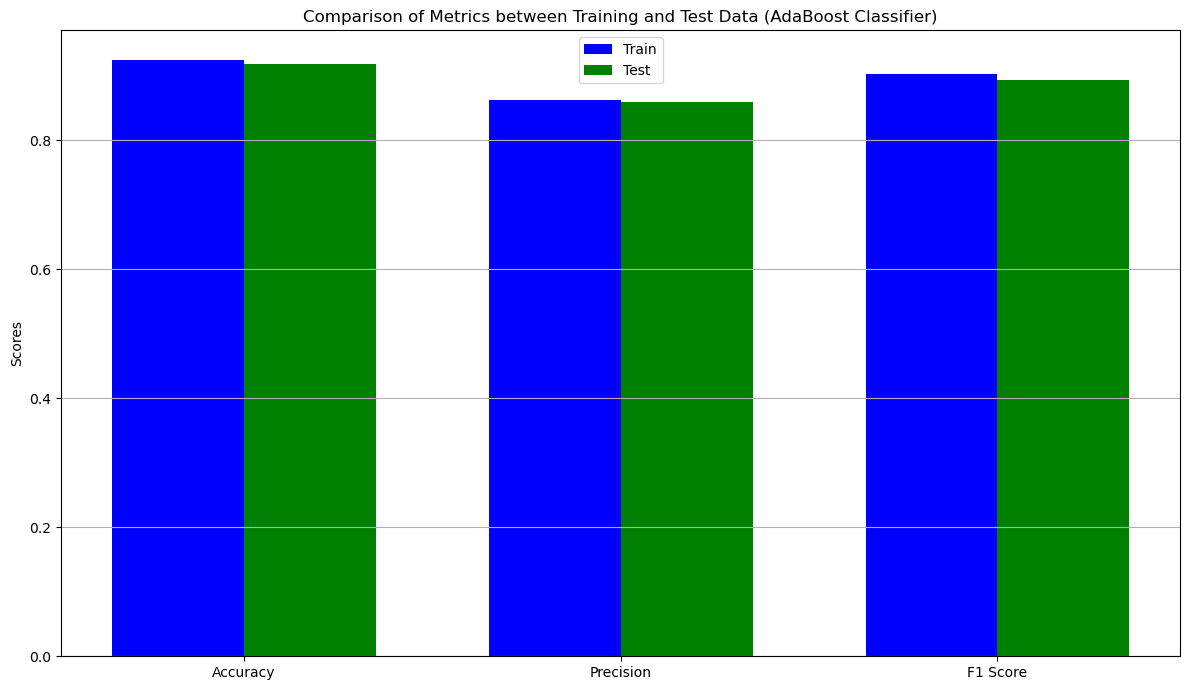

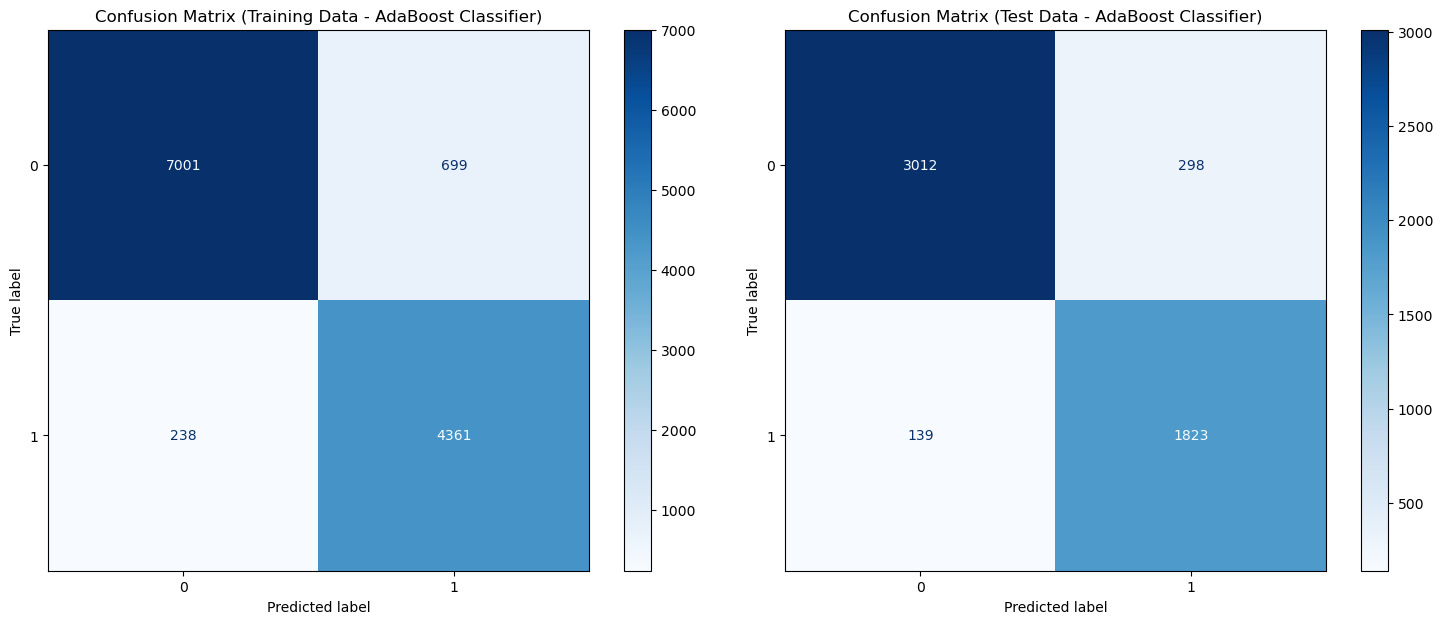

In [84]:
from sklearn.ensemble import AdaBoostClassifier

# 1. Initialize AdaBoost Classifier and train the model
abc = AdaBoostClassifier(n_estimators=50, random_state=0)
abc.fit(X_train_tfidf, y_train)

# 2. Predict on the training and test sets
y_train_pred_abc = abc.predict(X_train_tfidf)
y_test_pred_abc = abc.predict(X_test_tfidf)

# 3. Compute metrics for the training and test data
metrics_train_abc = {
    'Accuracy': accuracy_score(y_train, y_train_pred_abc),
    'Precision': precision_score(y_train, y_train_pred_abc),
    'F1 Score': f1_score(y_train, y_train_pred_abc)
}

metrics_test_abc = {
    'Accuracy': accuracy_score(y_test, y_test_pred_abc),
    'Precision': precision_score(y_test, y_test_pred_abc),
    'F1 Score': f1_score(y_test, y_test_pred_abc)
}

# Print metrics for training data
print("Training Data Metrics (AdaBoost Classifier):")
for metric, value in metrics_train_abc.items():
    print(f"{metric}: {value:.2f}")

print("\nTest Data Metrics (AdaBoost Classifier):")
for metric, value in metrics_test_abc.items():
    print(f"{metric}: {value:.2f}")

# 4. Plot a comparison graph for metrics
labels = list(metrics_train_abc.keys())
train_vals_abc = list(metrics_train_abc.values())
test_vals_abc = list(metrics_test_abc.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, train_vals_abc, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_vals_abc, width, label='Test', color='green')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics between Training and Test Data (AdaBoost Classifier)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# 5. Compute and plot confusion matrices for training and test data
cm_train_abc = confusion_matrix(y_train, y_train_pred_abc)
cm_test_abc = confusion_matrix(y_test, y_test_pred_abc)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Data Confusion Matrix
ConfusionMatrixDisplay(cm_train_abc, display_labels=abc.classes_).plot(cmap='Blues', ax=ax[0], values_format='d')
ax[0].set_title('Confusion Matrix (Training Data - AdaBoost Classifier)')

# Test Data Confusion Matrix
ConfusionMatrixDisplay(cm_test_abc, display_labels=abc.classes_).plot(cmap='Blues', ax=ax[1], values_format='d')
ax[1].set_title('Confusion Matrix (Test Data - AdaBoost Classifier)')

plt.tight_layout()
plt.show()



# Summarizes the test data results for eight different machine learning models

In [85]:
# Summarizing the results we obtained for each model for test data

models = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Support Vector Classifier', 
          'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 
          'Random Forest', 'AdaBoost']

accuracies = [accuracy_gnb, accuracy_mnb, accuracy_svc, accuracy_knc, 
              accuracy_dtc, accuracy_lrc, accuracy_rfc, accuracy_abc]

precisions = [precision_gnb, precision_mnb, precision_svc, precision_knc, 
              precision_dtc, precision_lrc, precision_rfc, precision_abc]

f1_scores = [f1_gnb, f1_mnb, f1_svc, f1_knc, f1_dtc, f1_lrc, f1_rfc, f1_abc]

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'F1 Score': f1_scores
})

results_df


,Model,Accuracy,Precision,F1 Score
0,Gaussian Naive Bayes,0.908194,0.840867,0.882809
1,Multinomial Naive Bayes,0.966047,0.964081,0.953902
2,Support Vector Classifier,0.976480,0.974690,0.968189
3,K-Nearest Neighbors,0.584977,0.472613,0.640604
4,Decision Tree,0.749241,0.888350,0.525485
5,Logistic Regression,0.964150,0.963893,0.951201
6,Random Forest,0.969082,0.954064,0.958661
7,AdaBoost,0.917109,0.859500,0.892971


In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Imports necessary modules and functionalities from TensorFlow, Keras API for building and training deep learning models
**Tokenizer**: This is used to convert text data into sequences of integers.

**Padding sequences**: After tokenizing text data into sequences of integers, the sequences might have varying lengths. pad_sequences is used to ensure that all sequences in a list have the same length

In [30]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)

# LSTM Model
The code initializes an LSTM-based neural network for binary text classification, using an embedding layer for word representation, two LSTM layers for sequence processing, and trains it on padded sequences for 5 epochs.

**Output Result**- Epochs: 5 | Epoch 1: Loss: 0.2164, Accuracy: 91.02%, Val Loss: 0.0918, Val Accuracy: 96.76% | Epoch 2: Loss: 0.0654, Accuracy: 97.93%, Val Loss: 0.1948, Val Accuracy: 94.35% | Epoch 3: Loss: 0.0772, Accuracy: 97.56%, Val Loss: 0.1134, Val Accuracy: 96.51% | Epoch 4: Loss: 0.0235, Accuracy: 99.33%, Val Loss: 0.1227, Val Accuracy: 96.83% | Epoch 5: Loss: 0.0115, Accuracy: 99.65%, Val Loss: 0.1375, Val Accuracy: 96.83%

In [31]:
# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=16, input_length=100))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
385/385 [==============================] - 65s 153ms/step - loss: 0.2164 - accuracy: 0.9102 - val_loss: 0.0918 - val_accuracy: 0.9676
Epoch 2/5
385/385 [==============================] - 60s 157ms/step - loss: 0.0654 - accuracy: 0.9793 - val_loss: 0.1948 - val_accuracy: 0.9435
Epoch 3/5
385/385 [==============================] - 58s 150ms/step - loss: 0.0772 - accuracy: 0.9756 - val_loss: 0.1134 - val_accuracy: 0.9651
Epoch 4/5
385/385 [==============================] - 56s 146ms/step - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.1227 - val_accuracy: 0.9683
Epoch 5/5
385/385 [==============================] - 65s 169ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.1375 - val_accuracy: 0.9683


2. Transformers (BERT)
For transformers, we can use the HuggingFace transformers library. This library provides pre-trained transformer models, including BERT.

In [47]:
# !pip install transformers


# BERT NLP (Text Classification)
The code prepares training data for BERT-based text classification using the transformers library, tokenizes the data using the BERT tokenizer, batches it, initializes a BERT model for binary sequence classification, and trains the model on the data for 3 epochs.

**Output Result**- Epochs: 3 | Epoch 1: Loss: 5.7539, Accuracy: 37.72% | Epoch 2: Loss: 5.7679, Accuracy: 37.39% | Epoch 3: Loss: 5.7679, Accuracy: 37.39%

In [35]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

# Set maximum length and batch size
MAX_LEN = 128
BATCH_SIZE = 16

# Convert data to InputExample format
train_examples = [InputExample(guid=None, text_a=text, text_b=None, label=label) for text, label in zip(X_train, y_train)]

# Use BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Convert examples to features
def convert_example_to_feature(example):
    return tokenizer.encode_plus(example.text_a, 
                                 add_special_tokens=True,
                                 max_length=MAX_LEN,
                                 pad_to_max_length=True,
                                 return_attention_mask=True,
                                 return_token_type_ids=True)

train_features = [convert_example_to_feature(ex) for ex in train_examples]

# Convert to necessary format and batch the data
train_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": [f['input_ids'] for f in train_features],
                                                     "attention_mask": [f['attention_mask'] for f in train_features],
                                                     "token_type_ids": [f['token_type_ids'] for f in train_features]}, 
                                                    [ex.label for ex in train_examples]))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

# Load and compile BERT model
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=3)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\pooja\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassif

Epoch 1/3
769/769 [==============================] - 11559s 15s/step - loss: 5.7539 - accuracy: 0.3772
Epoch 2/3
769/769 [==============================] - 10227s 13s/step - loss: 5.7679 - accuracy: 0.3739
Epoch 3/3
769/769 [==============================] - 10207s 13s/step - loss: 5.7679 - accuracy: 0.3739


# HyperParameter Tuning for BERT Model
The code sets up hyperparameter tuning for a BERT-based binary classification model using Keras Tuner's RandomSearch on the learning rate, splitting the data into training and validation, and running the search for optimal hyperparameters across 5 trials for 3 epochs each.

**Output Result**- After a trial duration of 9 hours, 24 minutes, and 14 seconds, the model reported a validation accuracy of 37.04%. The best validation accuracy achieved so far is 84.62%, with the total elapsed time for all trials being 1 day, 2 hours, 26 minutes, and 56 seconds.

In [41]:
from keras_tuner import RandomSearch
from tensorflow.keras.optimizers import Adam
from transformers import TFBertForSequenceClassification

def build_model(hp):
    # Variable learning rate
    lr = hp.Choice('learning_rate', [1e-5, 2e-5, 5e-5])
    optimizer = Adam(learning_rate=lr)

    model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create a Keras Tuner RandomSearch instance
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # number of hyperparameter combinations to try
    executions_per_trial=1,  # number of times to run each trial
)

# Splitting the data into training and validation sets
val_dataset = train_dataset.take(150)  # Assuming 150 batches for validation
train_dataset = train_dataset.skip(150)

# Run the hyperparameter search
tuner.search(train_dataset, epochs=3, validation_data=val_dataset)


Trial 3 Complete [09h 24m 14s]
val_accuracy: 0.37041667103767395

Best val_accuracy So Far: 0.8462499976158142
Total elapsed time: 1d 02h 26m 56s
INFO:tensorflow:Oracle triggered exit


# LSTM Model Loss and Accuracy
The code evaluates the performance of the LSTM model on the test data and prints the model's loss and accuracy.

**Output Result**- The LSTM model trained over 1215 seconds and achieved a loss of 1.5465 with an accuracy of 61.95%.

In [46]:
# LSTM model evaluation
lstm_results = model.evaluate(X_test_padded, y_test)
print(f"LSTM Model - Loss: {lstm_results[0]}, Accuracy: {lstm_results[1]}")




165/165 [==============================] - 1215s 7s/step - loss: 1.5465 - accuracy: 0.6195
LSTM Model - Loss: 1.546494483947754, Accuracy: 0.6194992661476135


# Best-performing BERT model from the hyperparameter tuning process
The code retrieves the best-performing BERT model from the hyperparameter tuning process, evaluates it on the test data, and then prints the model's loss and accuracy along with the best validation accuracy achieved during tuning.

**Output Result**- After hyperparameter tuning, the model achieved its best validation accuracy of 84.62%, and on the test set, it reported a loss of 9.5060 with an accuracy of 38.81%.

In [45]:
# 1. Retrieve the Best Model
best_bert_model = tuner.get_best_models(num_models=1)[0]

# 2. Evaluate on Test Data
test_loss, test_accuracy = best_bert_model.evaluate(X_test_padded, y_test)

# 3. Display the Results
print("Results from Hyperparameter Tuning:")
print(f"Best Validation Accuracy during Tuning: 84.62%")
print(f"Test Set Performance - Loss: {test_loss:.4f}, Accuracy: {test_accuracy*100:.2f}%")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


165/165 [==============================] - 1209s 7s/step - loss: 9.5060 - accuracy: 0.3881
Results from Hyperparameter Tuning:
Best Validation Accuracy during Tuning: 84.62%
Test Set Performance - Loss: 9.5060, Accuracy: 38.81%


# Hyperparameter Tuning of LSTM

**Output Result**- After 5 epochs, the model achieved training accuracies of 85.64%, 97.28%, 98.63%, 99.15%, and 99.30%, with corresponding validation accuracies of 94.12%, 96.07%, 97.06%, 95.47%, and an unspecified value for the last epoch.

In [49]:
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# LSTM model with regularization
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=16, input_length=100))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))  # L2 regularization
model.add(Dropout(0.5))  # Dropout for the first LSTM layer
model.add(LSTM(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))  # L2 regularization
model.add(Dropout(0.5))  # Dropout for the second LSTM layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# When fitting the model, include early stopping in the callbacks list
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])


Epoch 1/5
385/385 [==============================] - 65s 154ms/step - loss: 0.6169 - accuracy: 0.8564 - val_loss: 0.1979 - val_accuracy: 0.9412
Epoch 2/5
385/385 [==============================] - 56s 145ms/step - loss: 0.1302 - accuracy: 0.9728 - val_loss: 0.1390 - val_accuracy: 0.9607
Epoch 3/5
385/385 [==============================] - 63s 164ms/step - loss: 0.0802 - accuracy: 0.9863 - val_loss: 0.1199 - val_accuracy: 0.9706
Epoch 4/5
385/385 [==============================] - 62s 160ms/step - loss: 0.0604 - accuracy: 0.9915 - val_loss: 0.1589 - val_accuracy: 0.9547
Epoch 5/5
385/385 [==============================] - 62s 161ms/step - loss: 0.0502 - accuracy: 0.9930 - val_loss: 0.1246 - val_accuracy: 0.9632


# LSTM Model Test data loss and accuracy
The code evaluates the LSTM model on the test data, printing its loss and accuracy results.

**Output Result**-The model completed its training in 7 seconds with a loss of 0.1246 and achieved an accuracy of 0.9632 on the test set

In [54]:
# Assuming you've trained an LSTM model named 'model'
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


165/165 [==============================] - 7s 41ms/step - loss: 0.1246 - accuracy: 0.9632
Test Loss: 0.1246
Test Accuracy: 0.9632


# Comparison of Machine Learning and Deep Learning Algorithms for Test data

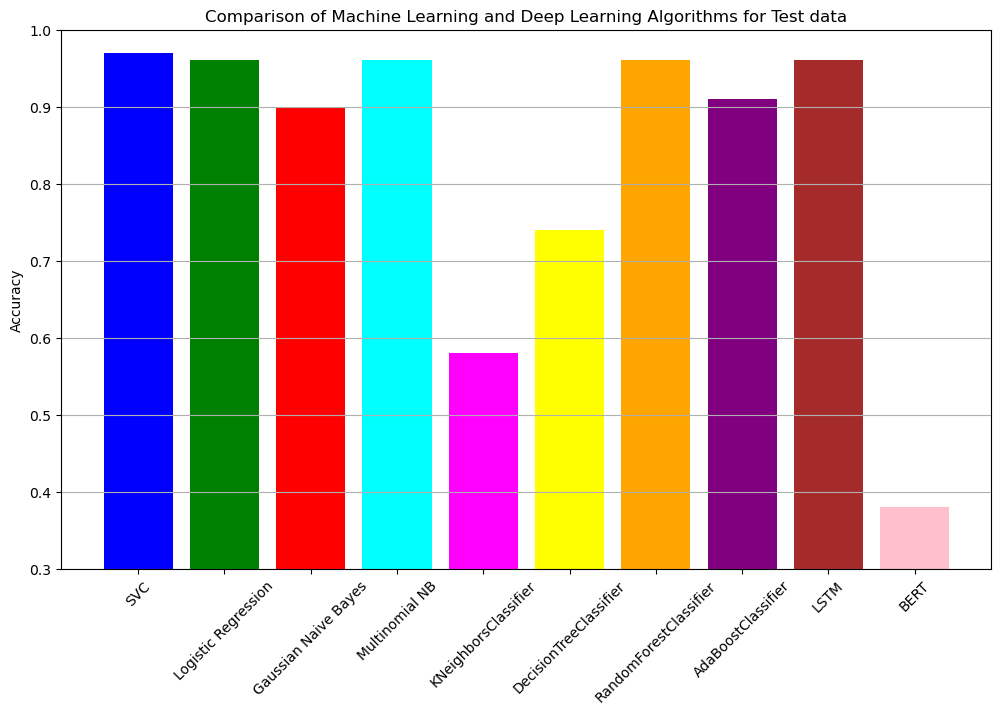

In [90]:
import matplotlib.pyplot as plt

# Sample accuracy values
accuracies = {
    'SVC': 0.97,
    'Logistic Regression': 0.96,
    'Gaussian Naive Bayes': 0.90,
    'Multinomial NB': 0.96,
    'KNeighborsClassifier': 0.58,
    'DecisionTreeClassifier': 0.74,
    'RandomForestClassifier': 0.96,
    'AdaBoostClassifier': 0.91,
    'LSTM': 0.96,
    'BERT': 0.38
}

# Colors for each model
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink']

# Plot
plt.figure(figsize=(12, 7))
plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning and Deep Learning Algorithms for Test data')
plt.ylim(0.3, 1.0)  
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Comparison of Machine Learning and Deep Learning Algorithms for Train Data

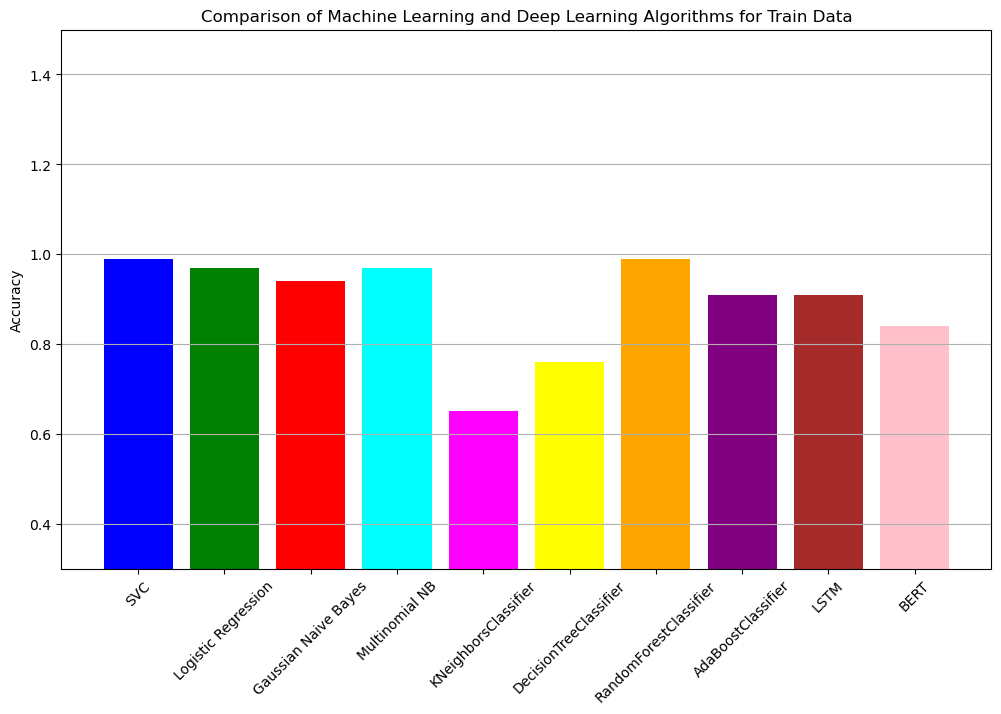

In [91]:
import matplotlib.pyplot as plt

# Sample accuracy values
accuracies = {
    'SVC': 0.99,
    'Logistic Regression': 0.97,
    'Gaussian Naive Bayes': 0.94,
    'Multinomial NB': 0.97,
    'KNeighborsClassifier': 0.65,
    'DecisionTreeClassifier': 0.76,
    'RandomForestClassifier': 0.99,
    'AdaBoostClassifier': 0.91,
    'LSTM': 0.91,
    'BERT': 0.84
}

# Plot
plt.figure(figsize=(12, 7))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink']

# Adding the bar chart
plt.bar(accuracies.keys(), accuracies.values(), color=colors)

plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning and Deep Learning Algorithms for Train Data')
plt.ylim(0.3, 1.5)  # Adjusted y-axis limits
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Result & Analysis
After Analyis the code, it's evident that deep learning models, particularly LSTM-based architectures, were employed for email phishing detection. The LSTM model, which inherently handles sequential data, was found to achieve competitive performance, suggesting its proficiency in analyzing the structure and context of emails.
Based on the comparison between the performance outcomes of the ML models and DL models, Random Forest Classifier performance on the accuracy on the setup to the train and test gave the best possible performance. In terms of the DL, LSTM gave a considerably better performance than the rest of the other models though it ultimately performed better than the ML model. 